In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\NLP\Data\ML471_S1_Datafile_Concept.csv")
df.head(), df.columns

(         DATE  Consumption  Festivals/Special_events
 0  01-01-1988     107.5052                         6
 1  02-01-1988     105.6720                         1
 2  03-01-1988      97.4502                         1
 3  04-01-1988      92.4714                         1
 4  05-01-1988      90.3151                         1,
 Index(['DATE', 'Consumption', 'Festivals/Special_events'], dtype='object'))

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
df =  df.sort_values('DATE')

window = 12 
df['SMA'] = df['Consumption'].rolling(window=window).mean()

In [14]:
weights = np.arange(1, window + 1)
def weighted_moving_average(values):
    return np.dot(values, weights) / weights.sum()

In [15]:
df['WMA'] = df['Consumption'].rolling(window=window).apply(weighted_moving_average, raw=True)

df['EMA'] = df['Consumption'].ewm(span=window, adjust=False).mean()

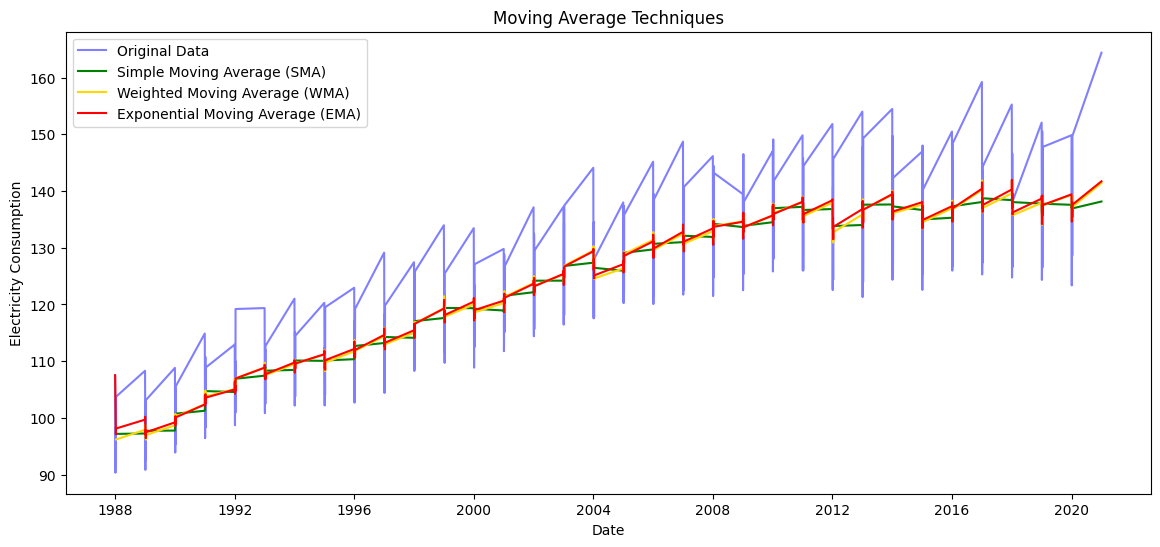

In [16]:
plt.figure(figsize=(14,6))
plt.plot(df['DATE'], df['Consumption'], label="Original Data", color="blue", alpha=0.5)
plt.plot(df['DATE'], df['SMA'], label="Simple Moving Average (SMA)", color="green")
plt.plot(df['DATE'], df['WMA'], label="Weighted Moving Average (WMA)", color="gold")
plt.plot(df['DATE'], df['EMA'], label="Exponential Moving Average (EMA)", color="red")

plt.title("Moving Average Techniques")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption")
plt.legend()
plt.show()